In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric
import joblib

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]


In [4]:
results_path = "/Volumes/noamaz/modularity/retina/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina"
num_layers = '4'
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/retina_multi_archs/{num_layers}_layers/"

In [21]:
reg_res_path = f'{results_path}/dynamic_retina_{num_layers}_layers/teach_archs_regression_results/'
p = [
    'retina_2023-08-16-11-47-15_lr_0.001_bs_512_output_meta_only_small_db.csv',
    'retina_2023-08-16-11-47-15_lr_0.005_bs_512_output_meta_only_small_db.csv',
    'retina_2023-08-16-11-47-15_lr_0.001_bs_512_output_meta_only_big_net_small_db.csv',
    'retina_2023-08-16-11-47-23_lr_0.001_bs_512_output_meta_only_normed.csv',
    'retina_2023-08-16-11-47-23_lr_0.005_bs_512_output_meta_only_normed.csv',
]
results = [
    pd.read_csv(f"{reg_res_path}/{path}")
    for path in p
]

names = [
    '79K db\nlr 0.001',
    '79K db\nlr 0.005',
    '79K db\nlr 0.005\nbig ANN',
    '126K db\nlr 0.001',
    '126K db\nlr 0.005',
    '126K db\nlr 0.001\nbig ANN',
    '126K db\nlr 0.005\nbig ANN',
]


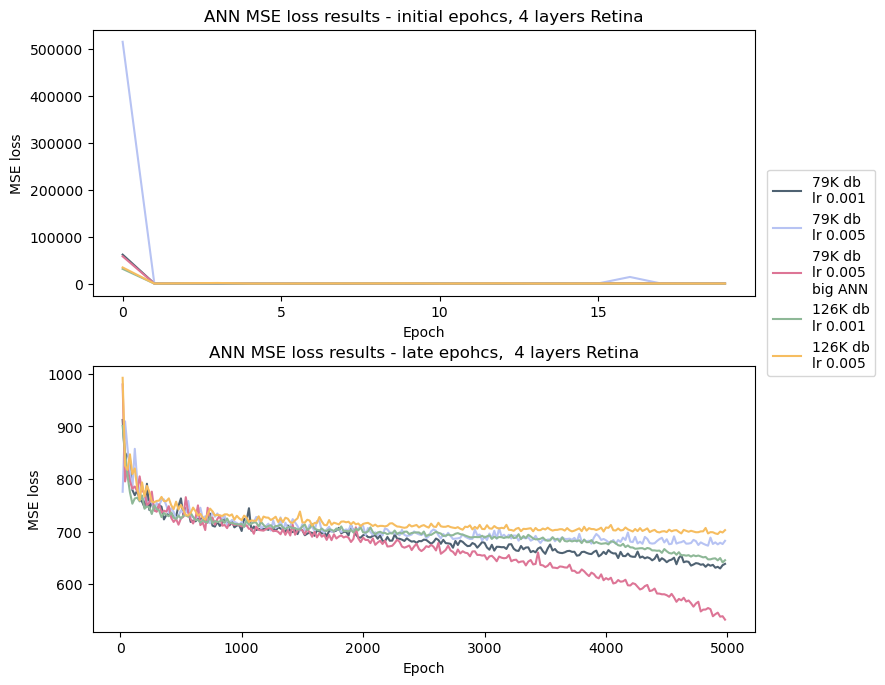

In [22]:
n = 20
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8))
for i, (name, res) in enumerate(zip(names, results)):
    ax1.plot(res['Epoch'][:n], res['losses'][:n], label=f'{name}', c=COLORS[i])
    ax2.plot(res['Epoch'][n::20], res['losses'][n::20], label=f'{name}', c=COLORS[i])
ax1.set_title('ANN MSE loss results - initial epohcs, 4 layers Retina')
ax2.set_title('ANN MSE loss results - late epohcs,  4 layers Retina')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('MSE loss')
ax2.set_ylabel('MSE loss')
ax1.set_xticks(np.arange(n)[::5])
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.95, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.95, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=1, fancybox=True, bbox_to_anchor=(1.10, 0.5))
plt.savefig(
    f"{plot_path}/{time_str}_loss_ANN.png")
plt.show()

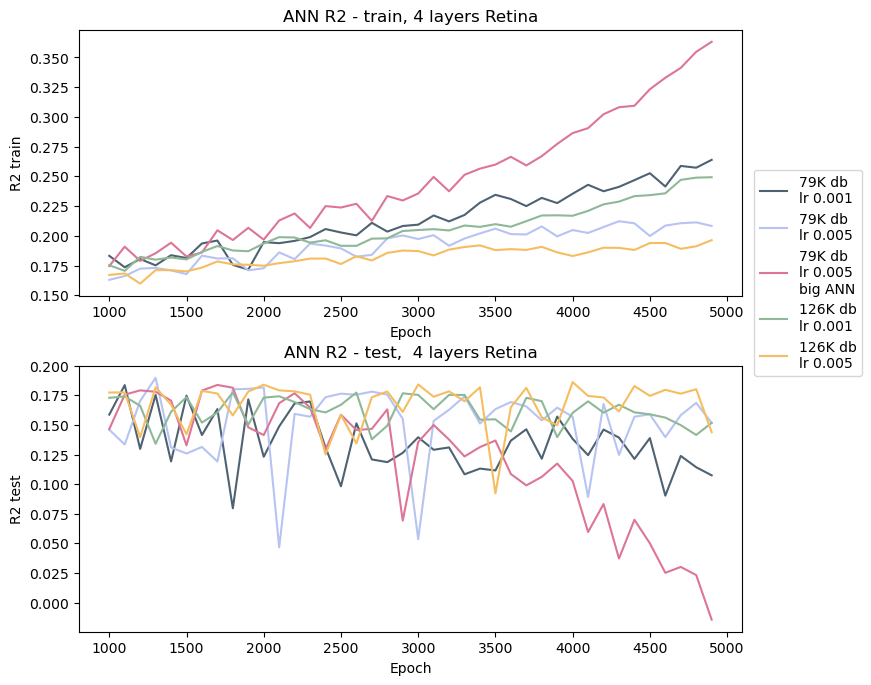

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8))
for i, (name, res) in enumerate(zip(names, results)):
    ax1.plot(res['Epoch'][1000::100], res['r2s train'][1000::100], label=f'{name}', c=COLORS[i])
    ax2.plot(res['Epoch'][1000::100], res['r2s test'][1000::100], label=f'{name}', c=COLORS[i])
ax1.set_title('ANN R2 - train, 4 layers Retina')
ax2.set_title('ANN R2 - test,  4 layers Retina')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('R2 train')
ax2.set_ylabel('R2 test')
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.95, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.95, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=1, fancybox=True, bbox_to_anchor=(1.10, 0.5))
plt.savefig(
    f"{plot_path}/{time_str}_r2_ANN.png")
plt.show()